# CNN( Convolutional Neural Network, 합성곱 신경망 )

In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

* 패션 MNIST 데이터셋 로드

In [25]:
( X_train, y_train ), ( X_test, y_test_org ) =\
    keras.datasets.fashion_mnist.load_data()

In [4]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )

X_train shape : (60000, 28, 28)
y_train shape : (60000,)


In [5]:
print( f'X_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_test shape : (10000, 28, 28)
y_test shape : (10000,)


* 패션 MNIST 이미지 

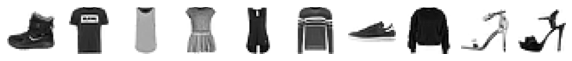

In [6]:
fig, axs = plt.subplots( 1, 10, figsize = ( 10, 10 ) )
for i in range( 10 ):
    axs[ i ].imshow( X_train[ i ], cmap = 'gray_r' )
    axs[ i ].axis( 'off' )
plt.show()

* 이미지에 채널 정보 추가

In [7]:
X_train_reshape = X_train.reshape( -1, 28, 28, 1 ) / 255.0

In [8]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_train_reshape, y_train, test_size = 0.2, random_state = 42
)

In [9]:
print( f'X_train_scaled shape : {X_train_scaled.shape}' )
print( f'X_test_scaled shape : {X_test_scaled.shape}' )

X_train_scaled shape : (48000, 28, 28, 1)
X_test_scaled shape : (12000, 28, 28, 1)


* 합성곱 신경망 모델 구성

In [10]:
model = keras.Sequential()
# 32개 필터 사용
# kernel size : 3 X 3
# padding : 특성 맵의 크기를 입력 이미지와 같은 크기
model.add( keras.layers.Conv2D( 32, kernel_size = 3, activation = 'relu',
                                padding = 'same', input_shape = ( 28, 28, 1 ) ) )
# kernel size : 2 x 2
model.add( keras.layers.MaxPooling2D( 2 ) )
model.add( keras.layers.Conv2D( 64, kernel_size = 3, activation = 'relu',
                                padding = 'same' ) )
model.add( keras.layers.MaxPooling2D( 2 ) )
model.add( keras.layers.Flatten() ) # 1차원 형태로 변환

# Fully-Connected
model.add( keras.layers.Dense( 100, activation = 'relu' ) )
model.add( keras.layers.Dropout( 0.4 ) )
model.add( keras.layers.Dense( 10, activation = 'softmax' ) )

2021-11-25 16:37:06.302807: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-25 16:37:06.304759: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

* 합성곱 신경망 모델 생성

In [14]:
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = [ 'accuracy' ] )

* 합성곱 신경망 학습

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint( 'best-cnn-model.h5' )
early_stopping_cb = keras.callbacks.EarlyStopping( patience = 2,
                                                   restore_best_weights = True )

history = model.fit( X_train_scaled, y_train, epochs = 20,
                     validation_data = ( X_test_scaled, y_test ),
                     callbacks = [ checkpoint_cb, early_stopping_cb ] )

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 148s 3ms/sample - loss: 0.5372 - accuracy: 0.8077 - val_loss: 0.3354 - val_accuracy: 0.8749
Epoch 2/20
48000/48000 [==============================] - 150s 3ms/sample - loss: 0.3564 - accuracy: 0.8726 - val_loss: 0.2872 - val_accuracy: 0.8934
Epoch 3/20
48000/48000 [==============================] - 139s 3ms/sample - loss: 0.3016 - accuracy: 0.8917 - val_loss: 0.2582 - val_accuracy: 0.9053
Epoch 4/20
48000/48000 [==============================] - 134s 3ms/sample - loss: 0.2672 - accuracy: 0.9035 - val_loss: 0.2492 - val_accuracy: 0.9100
Epoch 5/20
48000/48000 [==============================] - 134s 3ms/sample - loss: 0.2453 - accuracy: 0.9108 - val_loss: 0.2288 - val_accuracy: 0.9165
Epoch 6/20
48000/48000 [==============================] - 133s 3ms/sample - loss: 0.2254 - accuracy: 0.9173 - val_loss: 0.2317 - val_accuracy: 0.9172
Epoch 7/20
48000/48000 [==========================

* 학습 과정 시각화

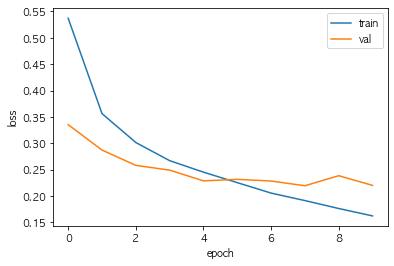

In [17]:
plt.plot( history.history[ 'loss' ] )
plt.plot( history.history[ 'val_loss' ] )
plt.xlabel( 'epoch' )
plt.ylabel( 'loss' )
plt.legend( [ 'train', 'val' ] )
plt.show()

* 합성곱 신경망 생성 모델 평가

In [19]:
model.evaluate( X_test_scaled, y_test, verbose = 2 )

12000/1 - 14s - loss: 0.3048 - accuracy: 0.9234


[0.21951183512806893, 0.9234167]

* 첫 번째 샘플 이미지에 대한 예측 결과 확인

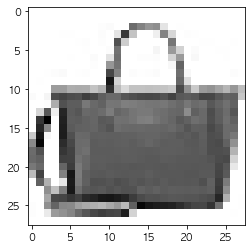

In [20]:
plt.imshow( X_test_scaled[ 0 ].reshape( 28, 28 ), cmap = 'gray_r' )
plt.show()

In [21]:
predict = model.predict( X_test_scaled[ 0:1 ] )
predict

array([[9.7861402e-17, 1.0450675e-27, 4.0678545e-20, 2.5224818e-20,
        2.1322471e-19, 1.3579353e-16, 2.2384503e-16, 1.6151144e-21,
        1.0000000e+00, 5.2196975e-21]], dtype=float32)

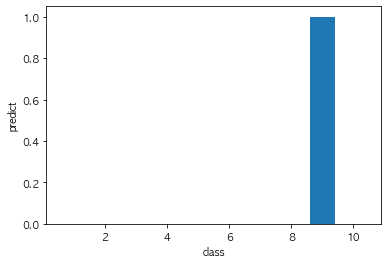

In [22]:
plt.bar( range( 1, 11 ), predict[ 0 ] )
plt.xlabel( 'class' )
plt.ylabel( 'predict' )
plt.show()

In [23]:
classes = [ '티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', 
            '셔츠', '스니커즈', '가방', '앵글부츠' ]
print( classes[ np.argmax( predict ) ] )

가방


* 테스트 데이터에 대한 평가

In [24]:
X_test_reshape = X_test.reshape( -1, 28, 28, 1 ) / 255.0

In [27]:
model.evaluate( X_test_reshape, y_test_org, verbose = 2 )

10000/1 - 12s - loss: 0.1886 - accuracy: 0.9163


[0.23794933788478376, 0.9163]